### [Important] Now we will do 2d metadynamics in phi and psi
Put ARG=phi,psi and for SIGMA=sigma_phi,sigma_psi
- Run at least 10 ns and check convergence of the FES with sum_hills. Is your bias factor and height okay or do you need to change it? Or run longer?
- sum_hills should produce a grid file which you can plot with imshow. Make a free energy surface with labeled axes and color bar. This time, add contour lines. This should look more like a surface than from replica exchange!
- Bonus: If you use the --stride function to get many surfaces, can you make an animated gif of the free energy surface filling in?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

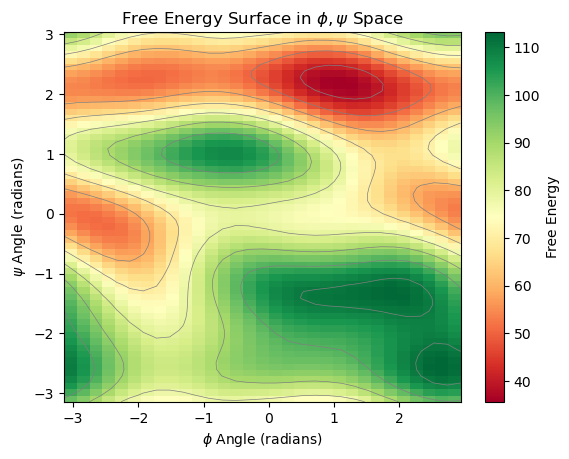

In [9]:
# Reference: gu-yaowen/comp-lab-class-2023

def plot_potential_surface(data):

    unique_phi = np.unique(data[:, 0])
    unique_psi = np.unique(data[:, 1])
    
    surface = np.empty((len(unique_phi), len(unique_psi)))

    for row in data:
        phi_idx = np.where(unique_phi == row[0])[0][0]
        psi_idx = np.where(unique_psi == row[1])[0][0]
        surface[phi_idx, psi_idx] = row[2]

    plt.imshow(surface, origin='lower', aspect='auto', cmap='RdYlGn',
               extent=[unique_psi.min(), unique_psi.max(),
                       unique_phi.min(), unique_phi.max()])
    plt.colorbar(label='Free Energy')
    CS = plt.contour(unique_psi, unique_phi, surface, colors='grey', linewidths=0.5)
    plt.xlabel(r'$\phi$ Angle (radians)')
    plt.ylabel(r'$\psi$ Angle (radians)')
    plt.title(r'Free Energy Surface in $\phi, \psi$ Space')

data = np.loadtxt('../Inputs/Q6/adp_2d.grid.dat')
plot_potential_surface(data)
plt.savefig('../Figures/Q6_Estimate of Free Energy.png', dpi=300)